In [1]:
import sys
import os

repository_root_directory = os.path.dirname(os.getcwd())
rrd = "repository_root_directory:\t"
print(rrd, repository_root_directory)

if repository_root_directory not in sys.path:
    sys.path.append(repository_root_directory)
    print(rrd, "added to path")
else:  
    print(rrd, "already in path")

repository_root_directory:	 /teamspace/studios/this_studio/csc_461_fp
repository_root_directory:	 added to path


In [4]:
import librosa
from matplotlib import pyplot as plt
from IPython.display import Audio
from utils import get_directory_size
import numpy as np
from features_extractor_cnn import FeaturesExtractor

2024-12-05 06:26:29.200234: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
original_dataset_directory = os.path.join(repository_root_directory, "_01_data/genres")
preprocessed_dataset_directory = os.path.join(repository_root_directory, "_02_data_preprocessed")

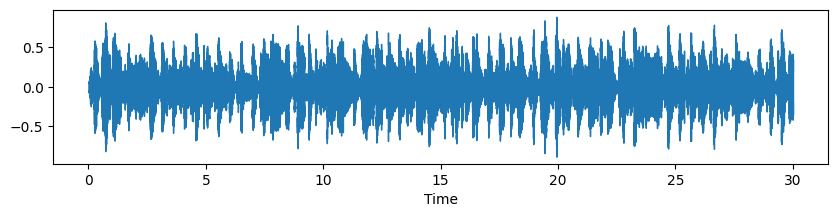

In [3]:
# visualizing the first blues audio file
blues_0 = os.path.join(original_dataset_directory, "blues/blues.00000.au")
blues_0_data, sr = librosa.load(blues_0, sr=None)
plt.figure(figsize=(10, 2))
librosa.display.waveshow(blues_0_data, sr=sr)

In [4]:
# displaying an audio player for the first blues audio file
Audio(data=blues_0_data, rate=sr)

In [5]:
blues_0_preprocessed = os.path.join(preprocessed_dataset_directory, "blues/blues.00000.wav")
blues_0_preprocessed_data, sr = librosa.load(blues_0_preprocessed, sr=None)
Audio(data=blues_0_preprocessed_data, rate=sr)

In [6]:
print("y.shape:", blues_0_data.shape)
print("y_b_00000.shape:", blues_0_preprocessed_data.shape)

y.shape: (661794,)
y_b_00000.shape: (661794,)


In [7]:
problem = os.path.join(preprocessed_dataset_directory, "jazz/jazz.00054.wav")
y, sr = librosa.load(problem, sr=None)
Audio(data=y, rate=sr)


In [8]:
print(get_directory_size(os.path.join(repository_root_directory, "_01_data/genres")))
print(get_directory_size(os.path.join(repository_root_directory, "_02_data_preprocessed")))


1324105955
1323967400


In [9]:
data_directory = os.path.join(repository_root_directory, "_02_data_preprocessed")
target_shape = (150, 150)
chunk_duration = 4
overlap_duration = 2
features_extractor = FeaturesExtractor(target_shape, chunk_duration, overlap_duration)

In [10]:
data, labels = features_extractor.extract_features_all_files(data_directory)

Using 7 CPUs for parallel processing.


2024-12-05 05:55:23.367583: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2024-12-05 05:55:23.368454: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2024-12-05 05:55:23.369028: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2024-12-05 05:55:23.371569: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2024-12-05 05:55:23.371664: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for bes

Skipping incomplete chunk from file: /teamspace/studios/this_studio/csc_461_fp/_02_data_preprocessed/blues/blues.00000.wavSkipping incomplete chunk from file: /teamspace/studios/this_studio/csc_461_fp/_02_data_preprocessed/blues/blues.00005.wav

Skipping incomplete chunk from file: /teamspace/studios/this_studio/csc_461_fp/_02_data_preprocessed/blues/blues.00002.wav


2024-12-05 05:55:24.280322: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Skipping incomplete chunk from file: /teamspace/studios/this_studio/csc_461_fp/_02_data_preprocessed/blues/blues.00006.wavSkipping incomplete chunk from file: /teamspace/studios/this_studio/csc_461_fp/_02_data_preprocessed/blues/blues.00001.wav

Skipping incomplete chunk from file: /teamspace/studios/this_studio/csc_461_fp/_02_data_preprocessed/blues/blues.00003.wav
Skipping incomplete chunk from file: /teamspace/studios/this_studio/csc_461_fp/_02_data_preprocessed/blues/blues.00004.wav
Skipping incomplete chunk from file: /teamspace/studios/this_studio/csc_461_fp/_02_data_preprocessed/blues/blues.00007.wav
Skipping incomplete chunk from file: /teamspace/studios/this_studio/csc_461_fp/_02_data_preprocessed/blues/blues.00008.wavSkipping incomplete chunk from file: /teamspace/studios/this_studio/csc_461_fp/_02_data_preprocessed/blues/blues.00009.wav

Skipping incomplete chunk from file: /teamspace/studios/this_studio/csc_461_fp/_02_data_preprocessed/blues/blues.00012.wav
Skipping incompl

In [13]:
print(data.shape)
print(labels.shape)

(13990, 150, 150, 1)
(13990,)


In [14]:
# save the extracted features and labels to a numpy file
npz_filename = "../_03_extracted_features_cnn.npz"
np.savez(npz_filename, data=data, labels=labels)
